# 파이썬으로 하는 데이터 시각화 - 워드클라우드 

### 1. 데이터 시각화 = (데이터 처리 후) 시각화
### 2. 데이터 형식 : txt, csv, json 등등
### 3. 데이터 처리 : 시각화를 할 수 있는 형식으로 만들기 위해 데이터를 손질해줘야 한다 - 데이터 분석 및 시각화 작업의 80% 이상
* ex) 워드 클라우드를 만들기 위한 데이터 처리 : "이디야는 좋은 원두를 사용하기 때문에 아메리카노와 라떼가 맛있다" => ['이디야', '원두', '아메리카노', '라떼']

### 4. 사용할 라이브러리
* 데이터 처리를 위한 라이브러리 : numpy, KoNLpy
* 데이터 시각화를 위한 라이브러리 : matplotlib, wordcloud

#### 파일 열기 -  https://www.w3schools.com/python/python_file_open.asp

In [1]:
speech = []
with open('moon_speech.txt', 'r', encoding='utf-8') as t:
#     print(t)
    speech = t.read().splitlines()
    
# print(speech[0])
#     print(type(t.read()))
# print(speech)

In [2]:
speech = [line for line in speech if line != '' and line != ' ']

# print(speech)

### KoNLPy를 이용한 한글 형태소 분석

http://konlpy.org/

#### KoNLPy 패키지에 있는 komoran 형태소 분석기 사용
https://github.com/shineware/KOMORAN
* POS = Part Of Speech
* 품사표 : https://docs.komoran.kr/firststep/postypes.html

In [3]:
from konlpy.tag import Komoran
tagger = Komoran()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [9]:
# speech[1]

# tags = tagger.pos(speech[1])
# print(tags)

tagged_speech = [tagger.pos(line) for line in speech]

# print(tagged_speech)

# tagged_speech = [ word for word, tag in sent for sent in tagged_speech ]

# tagged_speech2 = []

# for sent in tagged_speech:
#     sentence = []
#     for word, tag in sent:
#         if word != '국민':
#             sentence.append(word, tag)
        
# import pprint
# pprint.pprint(tagged_speech)

# for line in speech
# tagged_speech = [tagger.pos(line) for line in speech]




In [12]:
# 연설문의 명사 추출하기
speech_nouns = []

for sentence in tagged_speech:
    for word, tag in sentence:
        if tag in ['NNP', 'NNG']: # tag == 'NNP' or tag == 'NNG'
            speech_nouns.append(word)

# print(speech_nouns)

In [14]:
# 형용사 추출하기 

speech_vas = []
for sentence in tagged_speech:
    for word, tag in sentence:
        if tag == 'VA':
            speech_vas.append(word)


speech_vas = [word +'다' for word in speech_vas]
        
# pprint.pprint(speech_vas)

In [15]:
speech_nouns = [noun for noun in speech_nouns if noun not in ['존경', "국민", "여러분"]]
# pprint.pprint(speech_nouns)

In [16]:
from collections import Counter

noun_counts = Counter(speech_nouns)
# pprint.pprint(noun_counts)
# pprint.pprint(noun_counts.most_common())

In [17]:
va_counts = Counter(speech_vas)
# pprint.pprint(va_counts)

### Word Cloud
* 파이썬 시각화 도구인 matplotlib 사용 : https://matplotlib.org
* wordcloud 사용 : http://amueller.github.io/word_cloud/

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

In [19]:
# 워드클라우드 속성 설정

cloud = WordCloud(width=900, height=600,
                  font_path="NanumBarunGothic.ttf", 
                  background_color='black')

In [20]:
# noun_counts에 맞게 워드 클라우드 크기 설정
cloud = cloud.fit_words(noun_counts)

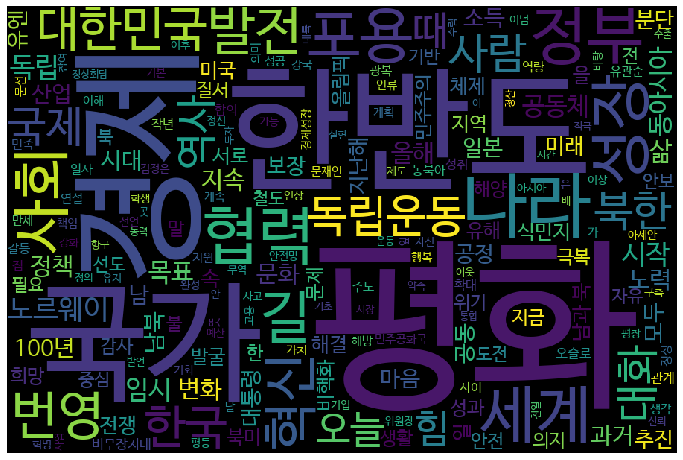

In [22]:
# plt를 이용해 워드클라우드 그리기
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [31]:
# 고양이 모양의 워드 클라우드 만들기
from PIL import Image
import numpy as np

cat = np.array(Image.open("cat.png"))
cat[cat.sum(axis=2) == 0] = 255

In [39]:
cat_cloud = WordCloud(width=900, height=600,
                  font_path="NanumBarunGothic.ttf", 
                  background_color='white',
                  mask=cat)
cat_cloud = cat_cloud.fit_words(noun_counts)

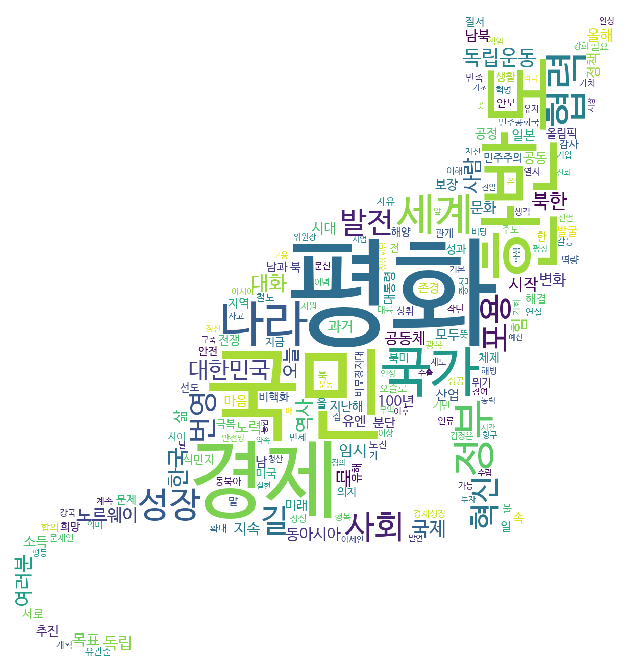

In [40]:
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(cat_cloud)
plt.show()